----- Linear SVM -----
Accuracy: 0.9766081871345029
[[ 61   2]
 [  2 106]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        63
           1       0.98      0.98      0.98       108

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171


----- RBF SVM -----
Accuracy: 0.9707602339181286
[[ 61   2]
 [  3 105]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        63
           1       0.98      0.97      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171

Fitting 5 folds for each of 9 candidates, totalling 45 fits

----- Best Parameters (RBF) -----
{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Accuracy (Tuned): 0.9707602339181286
Cross-validation accur

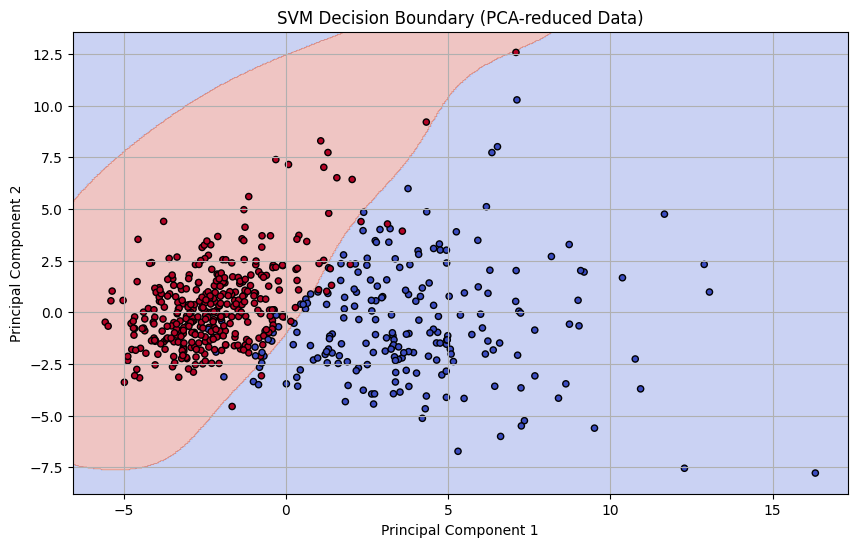

In [2]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.decomposition import PCA

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Linear SVM
linear_svm = SVC(kernel='linear', C=1.0)
linear_svm.fit(X_train, y_train)
y_pred_linear = linear_svm.predict(X_test)

print("----- Linear SVM -----")
print("Accuracy:", accuracy_score(y_test, y_pred_linear))
print(confusion_matrix(y_test, y_pred_linear))
print(classification_report(y_test, y_pred_linear))

# RBF SVM
rbf_svm = SVC(kernel='rbf', C=1.0, gamma='scale')
rbf_svm.fit(X_train, y_train)
y_pred_rbf = rbf_svm.predict(X_test)

print("\n----- RBF SVM -----")
print("Accuracy:", accuracy_score(y_test, y_pred_rbf))
print(confusion_matrix(y_test, y_pred_rbf))
print(classification_report(y_test, y_pred_rbf))

# Hyperparameter Tuning with GridSearchCV
param_grid = {'C': [0.1, 1, 10], 'gamma': ['scale', 0.01, 0.001], 'kernel': ['rbf']}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=1, cv=5)
grid.fit(X_train, y_train)

print("\n----- Best Parameters (RBF) -----")
print(grid.best_params_)

# Evaluate best model
grid_predictions = grid.predict(X_test)
print("Accuracy (Tuned):", accuracy_score(y_test, grid_predictions))

# Cross-validation
cv_scores = cross_val_score(grid.best_estimator_, X_scaled, y, cv=5)
print("Cross-validation accuracy: ", np.mean(cv_scores))

# Visualization using PCA (reduce to 2D)
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_scaled)

# Train SVM on reduced data
svm_vis = SVC(kernel='rbf', C=grid.best_params_['C'], gamma=grid.best_params_['gamma'])
svm_vis.fit(X_reduced, y)

# Mesh grid for decision boundary
x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))
Z = svm_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='coolwarm', s=20, edgecolors='k')
plt.title("SVM Decision Boundary (PCA-reduced Data)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()
